# LEGO history project

This project aims at identification of key facts about lego sets and parts. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Data import

Data was obtained from rebrickable. This dataset is updated daily, the version used was downloaded on 2023-11-10. For analysis of sets, the cutoff year is set to 2022. 

In [2]:
colors = pd.read_csv('data/colors.csv.gz', 
                     compression='gzip', sep=',')
elements = pd.read_csv('data/elements.csv.gz', 
                       compression='gzip', sep=',')
inventories = pd.read_csv('data/inventories.csv.gz', 
                          compression='gzip', sep=',')
inventory_minifigs = pd.read_csv('data/inventory_minifigs.csv.gz', 
                                 compression='gzip', sep=',')
inventory_parts = pd.read_csv('data/inventory_parts.csv.gz', 
                              compression='gzip', sep=',')
inventory_sets = pd.read_csv('data/inventory_sets.csv.gz', 
                             compression='gzip', sep=',')
minifigs = pd.read_csv('data/minifigs.csv.gz', 
                       compression='gzip', sep=',')
part_categories = pd.read_csv('data/part_categories.csv.gz', 
                              compression='gzip', sep=',')
part_relationships = pd.read_csv('data/part_relationships.csv.gz', 
                                 compression='gzip', sep=',')
parts = pd.read_csv('data/parts.csv.gz', 
                    compression='gzip', sep=',')
sets = pd.read_csv('data/sets.csv.gz', 
                   compression='gzip', sep=',')
themes = pd.read_csv('data/themes.csv.gz',  
                     compression='gzip', sep=',')

# Sets analysis

At first, sets are merged with themes. Then, the analysis was performed for 5 themes with the biggest number of sets throughout the years. 

In [72]:
sets_themes = sets.merge(themes, how='left', 
                         left_on='theme_id',
                         right_on='id',
                         suffixes=['_sets', '_themes'])
sets_themes = sets_themes.drop(columns=['id', 'theme_id'])
sets_themes['name_themes'] = sets_themes['name_themes'].str.replace('UCS', 'Ultimate Collector Series')

excluded_themes = ['Books', 'Key Chain', 'Gear', 'Supplemental', 'Service Packs', 'Stationery and Office Supplies', 'Video Games and Accessories', 'Houseware', 'Role Play Toys and Costumes', 'Clocks and Watches', 'LEGO Brand Store', 'Promotional', 'Storage', 'Plush Toys', 'Bag and Luggage Tags', 'Audio and Visual Media', 'Dimensions']
print(f'List of excluded themes ({100 - (100 * len(filtered_sets) / len(sets)):.2f} %):')
print(excluded_themes)

filtered_sets = sets_themes[~sets_themes['name_themes'] \
                            .isin(excluded_themes)]
themes_count = filtered_sets['name_themes'].value_counts()

n_themes = 5
included_themes = list(themes_count.head(n_themes).index)
df_sets = sets_themes[sets_themes['name_themes'].isin(included_themes)]
print(f'\nList of included themes ({(100 * len(df_sets) / len(sets)):.2f} %):')
print(included_themes)

List of excluded themes (23.58 %):
['Books', 'Key Chain', 'Gear', 'Supplemental', 'Service Packs', 'Stationery and Office Supplies', 'Video Games and Accessories', 'Houseware', 'Role Play Toys and Costumes', 'Clocks and Watches', 'LEGO Brand Store', 'Promotional', 'Storage', 'Plush Toys', 'Bag and Luggage Tags', 'Audio and Visual Media', 'Dimensions']

List of included themes (15.18 %):
['Star Wars', 'Technic', 'Friends', 'Ninjago', 'Basic Set']


## Set analysis over the years
The following hypotheses were examined:  
- mean number of parts through the years  
- distn of number of parts through decades  
- distn of 5 biggest themes through the years  
- scatterplot of number of sets in a year, with part_no  

In [76]:
# add column with decades
sets_themes['decade'] = (sets_themes['year'] // 10) * 10
sets_themes.groupby('decade')['name_sets'].count()

decade
1940       5
1950     175
1960     417
1970     645
1980    1238
1990    2171
2000    4721
2010    8395
2020    4175
Name: name_sets, dtype: int64

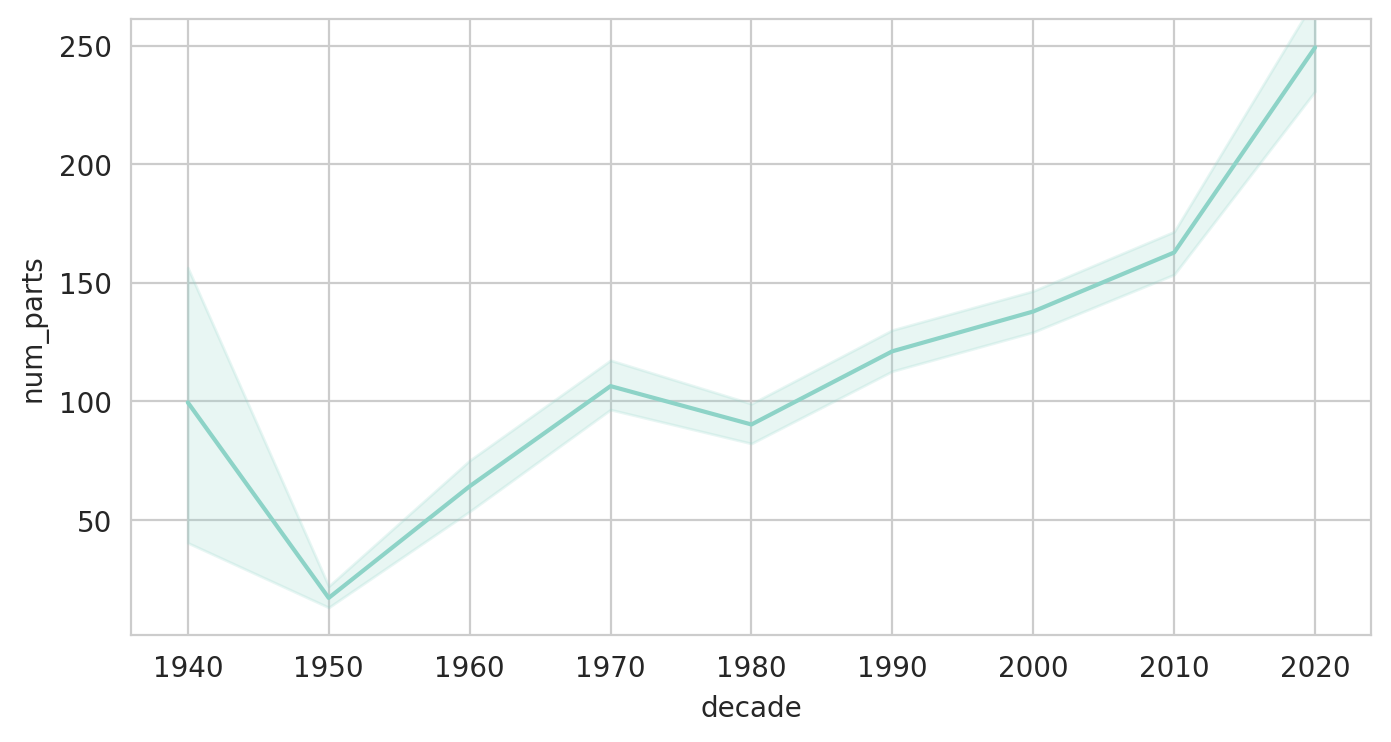

In [77]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=sets_themes, x='decade', y='num_parts')
plt.show()

## Database exploration

In [12]:
print(f"Number of Lego sets in the dataset: {sets.shape[0]} rows")
print(f"Number of columns in the dataset: {sets.shape[1]} columns")

Number of Lego sets in the dataset: 21942 rows
Number of columns in the dataset: 6 columns


In [13]:
print(sets.info())
print('-------------------------------')
print(sets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21942 entries, 0 to 21941
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    21942 non-null  object
 1   name       21942 non-null  object
 2   year       21942 non-null  int64 
 3   theme_id   21942 non-null  int64 
 4   num_parts  21942 non-null  int64 
 5   img_url    21942 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.0+ MB
None
-------------------------------
               year      theme_id     num_parts
count  21942.000000  21942.000000  21942.000000
mean    2007.794549    442.211694    160.984049
std       13.958032    215.411281    417.637181
min     1949.000000      1.000000      0.000000
25%     2001.000000    273.000000      2.000000
50%     2012.000000    497.000000     30.000000
75%     2018.000000    608.000000    139.000000
max     2024.000000    752.000000  11695.000000


In [14]:
max_pieces_bool = sets['num_parts'] == sets['num_parts'].max()
max_pieces_set = sets.loc[max_pieces_bool].iloc[0]
print(f"Set name with the most pieces: {max_pieces_set['name']} "
      f"with {max_pieces_set['num_parts']} parts from {max_pieces_set['year']}")

print(f"Year range in the dataset: {sets.year.min()} - {sets.year.max()}")
print(f"Number of unique set names: {sets['name'].nunique()}")
print(f"Number of themes: {sets['theme_id'].nunique()}")

set_names = sets['name'].value_counts()
print(f"Number of sets with unique names: {len(set_names[set_names == 1])}")
print(f"Number of sets with repetitive names: {len(set_names[set_names > 1])}")

Set name with the most pieces: World Map with 11695 parts from 2021
Year range in the dataset: 1949 - 2024
Number of unique set names: 18809
Number of themes: 461
Number of sets with unique names: 17281
Number of sets with repetitive names: 1528


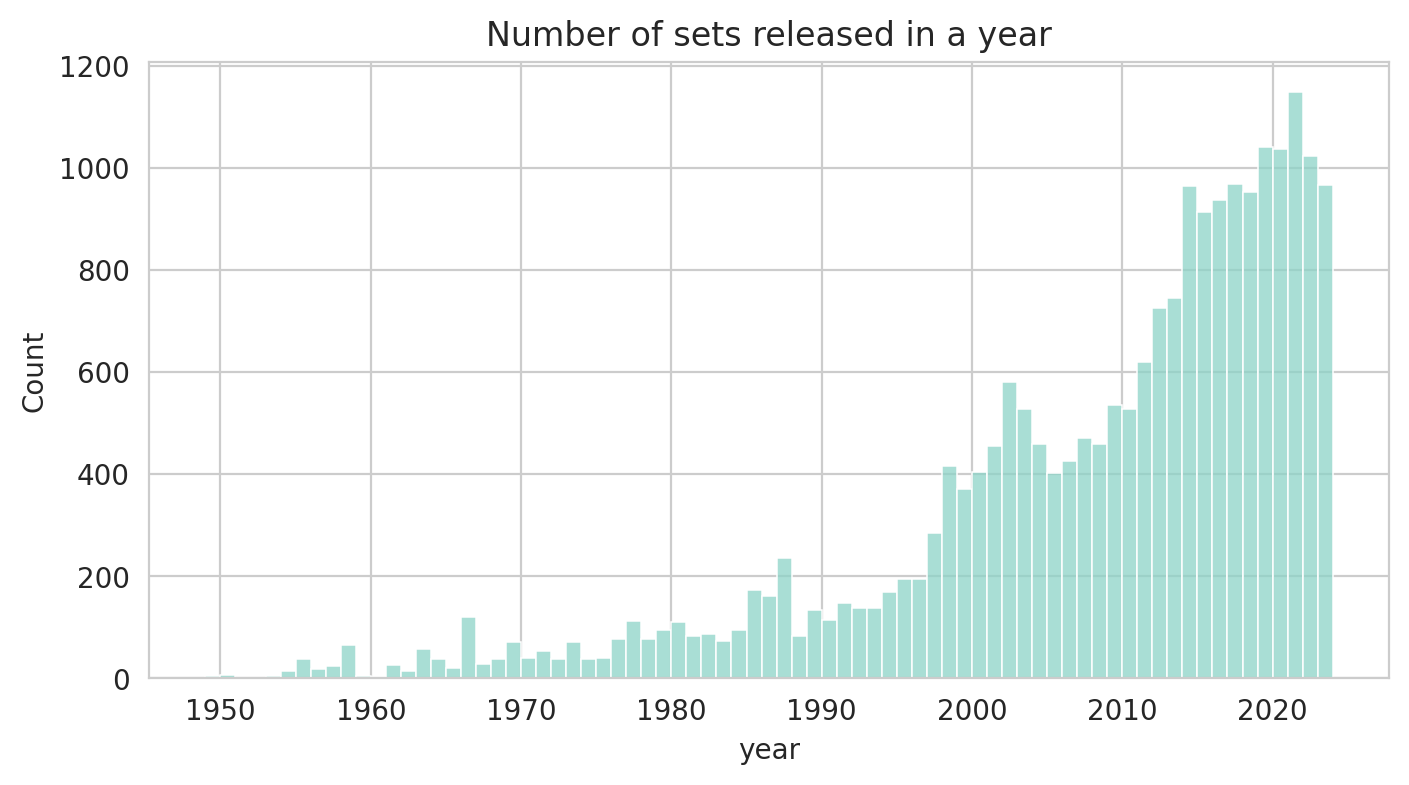

In [16]:
fig = plt.figure(figsize=(8,4))
sns.histplot(data=sets, x='year', binwidth=1)
plt.title('Number of sets released in a year')
plt.show()

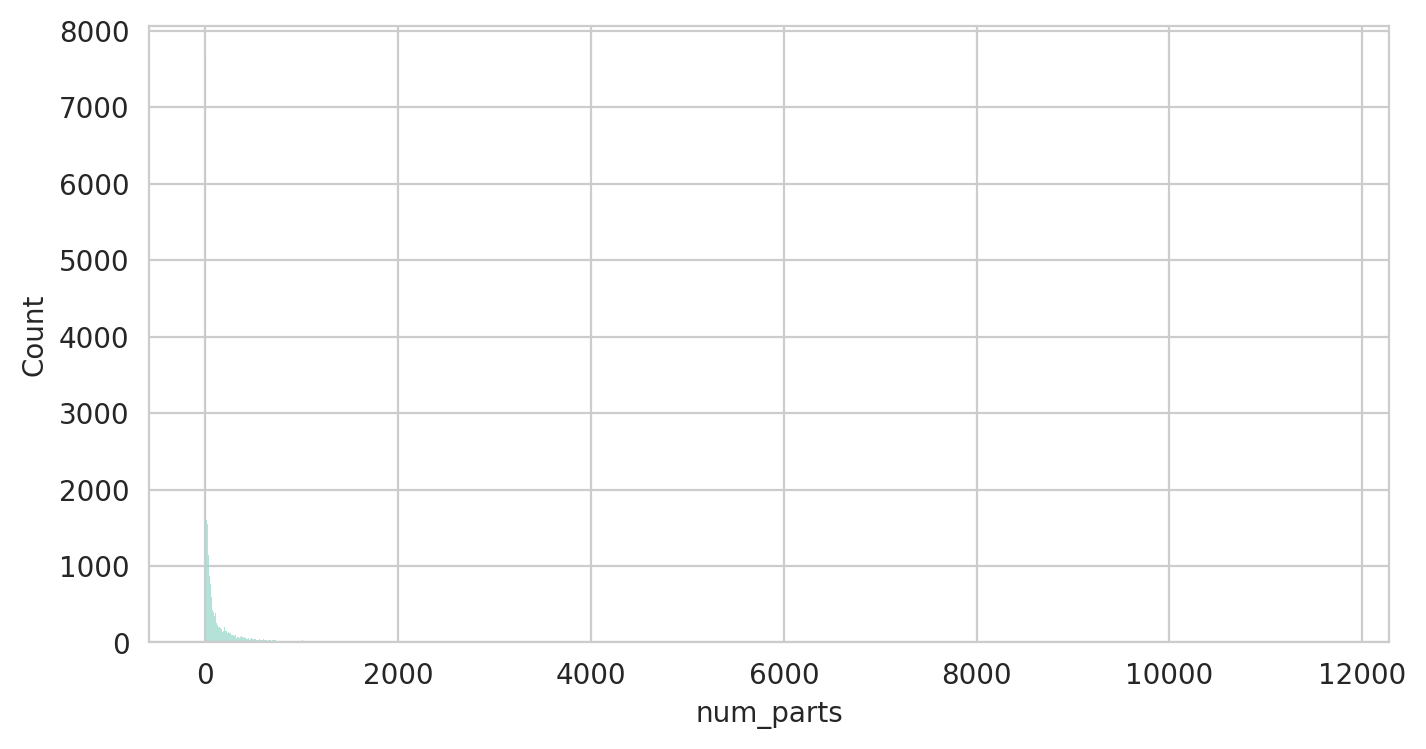

In [82]:
fig = plt.figure(figsize=(8,4))
sns.histplot(data=sets, x='num_parts')
plt.show()

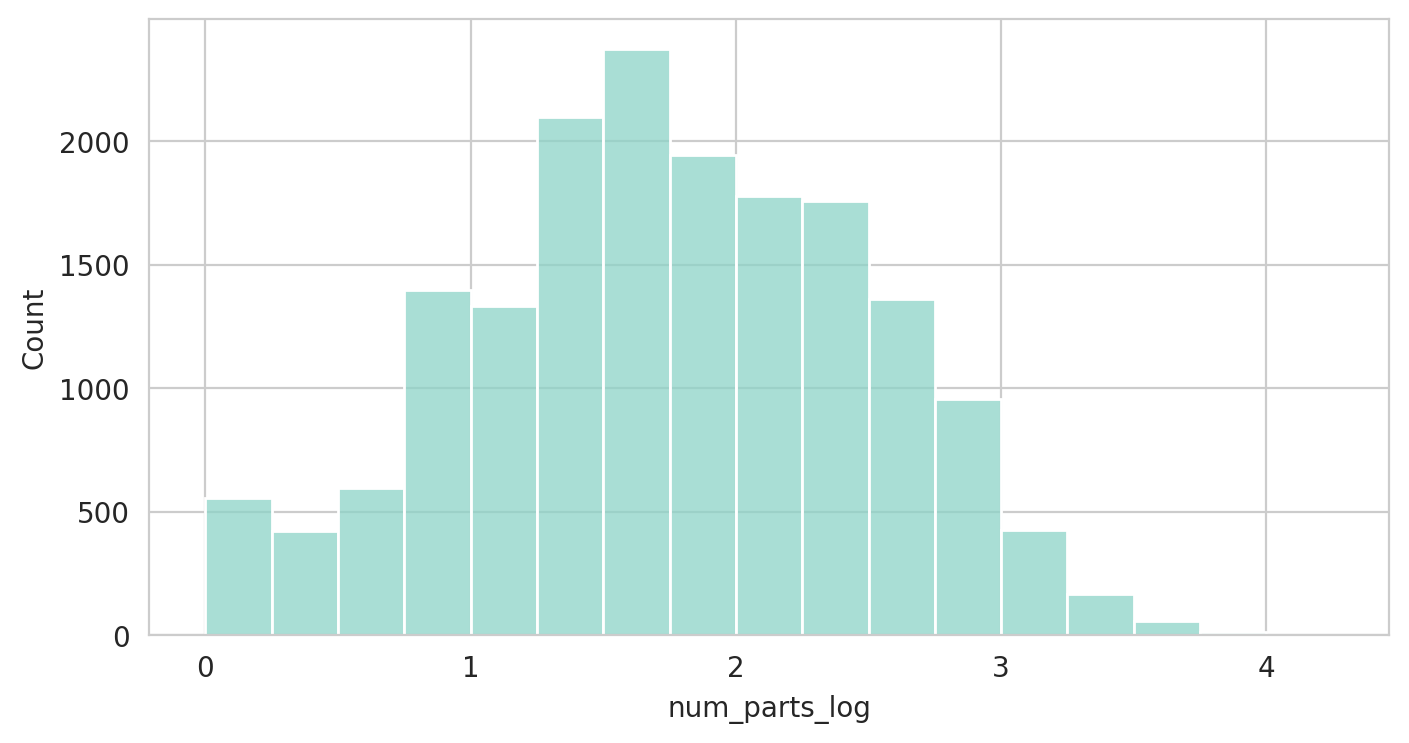

In [81]:
sets['num_parts_log'] = sets['num_parts'].apply(np.log10)
fig = plt.figure(figsize=(8,4))
sns.histplot(data=sets, x='num_parts_log', binwidth=0.25)
plt.show()